In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

### Figure 3

#### Figure 3A

Population density Mann-Whitney rank test | Infection Cluster
MannwhitneyuResult(statistic=16.0, pvalue=0.16646080403278296)
MannwhitneyuResult(statistic=5.0, pvalue=6.300947315414655e-06)
MannwhitneyuResult(statistic=52.0, pvalue=0.005892750468002969)
Population density Mann-Whitney rank test | Death Cluster
MannwhitneyuResult(statistic=7.0, pvalue=0.16867782588818075)
MannwhitneyuResult(statistic=0.0, pvalue=0.0004959222753980065)
MannwhitneyuResult(statistic=5.0, pvalue=6.085721361452047e-05)
Population density Mann-Whitney rank test | Fatality Cluster
MannwhitneyuResult(statistic=2.0, pvalue=0.0010870212762758285)
MannwhitneyuResult(statistic=77.0, pvalue=0.046375057117337325)
MannwhitneyuResult(statistic=34.0, pvalue=5.595995269800735e-06)


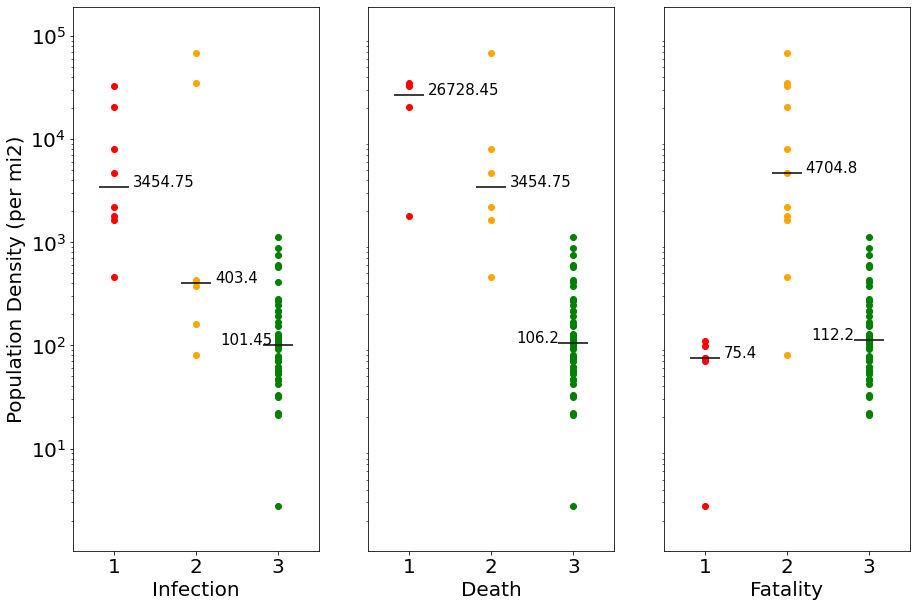

In [ ]:
sydata = pd.read_csv("/covid19-project/final file/data/sycluster.csv")
sydata['County'] = sydata['County'].replace('New York', 'Manhattan')
sydata['County'] = sydata['County'].replace('Staten Island', 'Richmond')

dendata = pd.read_csv("/covid19-project/final file/data/NY_Census.csv") 
dendata = dendata.replace('Kings County', 'Brooklyn County')
dendata = dendata.replace('New York County', 'Manhattan County')
dendata = dendata.replace('Staten Island County', 'Richmond County')
dendata = dendata[dendata['Area_Name'] != 'New York']
dendata['County'] = dendata['Area_Name'].map(lambda x: x[0:-7])

clusters = ['CaseCluster', 'DeathCluster', 'PosDeathCluster']
clustdict = {'CaseCluster' : 'Infection', 'DeathCluster': 'Death', 'PosDeathCluster': 'Fatality'}

caseandden = sydata.merge(dendata, on = 'County')

i = 0
subplots = [131, 132, 133]
plt.figure(figsize=(15,10))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
for cluster in clusters:

  print('Population density Mann-Whitney rank test | '+ clustdict[cluster] +' Cluster')
  print(mannwhitneyu(caseandden[caseandden[cluster] == 1]['Density.per.square.mile.of.land.area...Population'], caseandden[caseandden[cluster] == 2]['Density.per.square.mile.of.land.area...Population']))
  print(mannwhitneyu(caseandden[caseandden[cluster] == 1]['Density.per.square.mile.of.land.area...Population'], caseandden[caseandden[cluster] == 3]['Density.per.square.mile.of.land.area...Population']))
  print(mannwhitneyu(caseandden[caseandden[cluster] == 2]['Density.per.square.mile.of.land.area...Population'], caseandden[caseandden[cluster] == 3]['Density.per.square.mile.of.land.area...Population']))

  caseanddenPoscust1 = caseandden[caseandden[cluster] == 1]
  caseanddenPoscust2 = caseandden[caseandden[cluster] == 2]
  caseanddenPoscust3 = caseandden[caseandden[cluster] == 3]

  qcust1 = [np.quantile(caseanddenPoscust1['Density.per.square.mile.of.land.area...Population'].to_list(), 0.5)]
  qcust2 = [np.quantile(caseanddenPoscust2['Density.per.square.mile.of.land.area...Population'].to_list(), 0.5)]
  qcust3 = [np.quantile(caseanddenPoscust3['Density.per.square.mile.of.land.area...Population'].to_list(), 0.5)]
  
  ax[i].scatter(caseanddenPoscust1[cluster], caseanddenPoscust1['Density.per.square.mile.of.land.area...Population'], color='red')
  ax[i].scatter([1], qcust1, marker='_', s=[30**2], color='black')

  ax[i].text(1.23, qcust1[0]-0.4, str(round(qcust1[0],2)), fontsize = 15)

  ax[i].scatter(caseanddenPoscust2[cluster], caseanddenPoscust2['Density.per.square.mile.of.land.area...Population'], color='orange')
  ax[i].scatter([2], qcust2, marker='_', s=[30**2], color='black')

  if cluster == 'CaseCluster' :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)
  else :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)

  ax[i].scatter(caseanddenPoscust3[cluster], caseanddenPoscust3['Density.per.square.mile.of.land.area...Population'], color='green')
  ax[i].scatter([3], qcust3, marker='_', s=[30**2], color='black')

  ax[i].text(3-0.7, qcust3[0]-0.2, str(round(qcust3[0],2)), fontsize =15)
  
  ax[i].tick_params(axis='both', which='major', labelsize=20)
  ax[i].set_xticks(np.arange(1, 4, step=1))
  # ax[i].set_yticks(np.arange(0, 31, step=5))
  ax[i].set_yscale('log')

  if i == 0:
    ax[i].tick_params(axis='y', colors='black')
  else:
    ax[i].tick_params(axis='y', colors='white')

  ax[i].set_xlabel(clustdict[cluster], fontsize=20)

  if i == 0:
    ax[i].set_ylabel('Population Density (per mi2)', fontsize=20)
  else:
    ax[i].set_ylabel('', fontsize=20)

  ax[i].margins(x=0.25, y=0.1)

  i += 1

plt.show()

#### Figure 3B

Age > 55 Mann-Whitney rank test | Infection Cluster
MannwhitneyuResult(statistic=12.0, pvalue=0.06881912755409139)
MannwhitneyuResult(statistic=38.0, pvalue=0.00016272737255063147)
MannwhitneyuResult(statistic=92.0, pvalue=0.07816973418096802)
Age > 55 Mann-Whitney rank test | Death Cluster
MannwhitneyuResult(statistic=3.0, pvalue=0.03497717929000515)
MannwhitneyuResult(statistic=6.0, pvalue=0.0009614527637401293)
MannwhitneyuResult(statistic=36.0, pvalue=0.0011400555648694135)
Age > 55 Mann-Whitney rank test | Fatality Cluster
MannwhitneyuResult(statistic=1.0, pvalue=0.0007731017385403692)
MannwhitneyuResult(statistic=55.0, pvalue=0.010057288181236052)
MannwhitneyuResult(statistic=64.0, pvalue=8.032596890784928e-05)


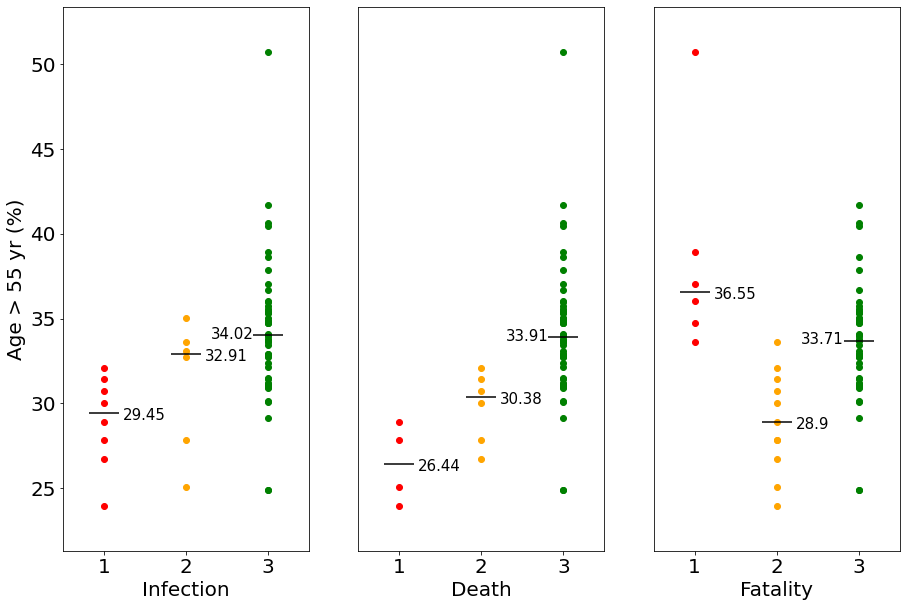

In [ ]:
sydata = pd.read_csv("/covid19-project/final file/data/sycluster.csv")
sydata['County'] = sydata['County'].replace('New York', 'Manhattan')
sydata['County'] = sydata['County'].replace('Staten Island', 'Richmond')

agedata = pd.read_csv("/covid19-project/final file/data/NY_55Plus.csv")

caseand55age = sydata.merge(agedata, on = 'County')

i = 0
subplots = [131, 132, 133]
plt.figure(figsize=(15,10))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
for cluster in clusters:

  print('Age > 55 Mann-Whitney rank test | '+ clustdict[cluster] +' Cluster')
  print(mannwhitneyu(caseand55age[caseand55age[cluster] == 1]['%ab55'], caseand55age[caseand55age[cluster] == 2]['%ab55']))
  print(mannwhitneyu(caseand55age[caseand55age[cluster] == 1]['%ab55'], caseand55age[caseand55age[cluster] == 3]['%ab55']))
  print(mannwhitneyu(caseand55age[caseand55age[cluster] == 2]['%ab55'], caseand55age[caseand55age[cluster] == 3]['%ab55']))


  caseand55agePoscust1 = caseand55age[caseand55age[cluster] == 1]
  caseand55agePoscust2 = caseand55age[caseand55age[cluster] == 2]
  caseand55agePoscust3 = caseand55age[caseand55age[cluster] == 3]

  qcust1 = [np.quantile(caseand55agePoscust1['%ab55'].to_list(), 0.5)]
  qcust2 = [np.quantile(caseand55agePoscust2['%ab55'].to_list(), 0.5)]
  qcust3 = [np.quantile(caseand55agePoscust3['%ab55'].to_list(), 0.5)]
  
  ax[i].scatter(caseand55agePoscust1[cluster], caseand55agePoscust1['%ab55'], color='red')
  ax[i].scatter([1], qcust1, marker='_', s=[30**2], color='black')

  ax[i].text(1.23, qcust1[0]-0.4, str(round(qcust1[0],2)), fontsize = 15)

  ax[i].scatter(caseand55agePoscust2[cluster], caseand55agePoscust2['%ab55'], color='orange')
  ax[i].scatter([2], qcust2, marker='_', s=[30**2], color='black')

  if cluster == 'CaseCluster' :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)
  else :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)

  ax[i].scatter(caseand55agePoscust3[cluster], caseand55agePoscust3['%ab55'], color='green')
  ax[i].scatter([3], qcust3, marker='_', s=[30**2], color='black')

  ax[i].text(3-0.7, qcust3[0]-0.2, str(round(qcust3[0],2)), fontsize =15)
  
  ax[i].tick_params(axis='both', which='major', labelsize=20)
  ax[i].set_xticks(np.arange(1, 4, step=1))
  ax[i].set_yticks(np.arange(20, 56, step=5))

  if i == 0:
    ax[i].tick_params(axis='y', colors='black')
  else:
    ax[i].tick_params(axis='y', colors='white')

  ax[i].set_xlabel(clustdict[cluster], fontsize=20)

  if i == 0:
    ax[i].set_ylabel('Age > 55 yr (%)', fontsize=20)
  else:
    ax[i].set_ylabel('', fontsize=20)

  ax[i].margins(x=0.25, y=0.1)

  i += 1

plt.show()

#### Figure 3C

African American Mann-Whitney rank test | Infection Cluster
MannwhitneyuResult(statistic=16.0, pvalue=0.16646080403278296)
MannwhitneyuResult(statistic=19.0, pvalue=2.6836772274287402e-05)
MannwhitneyuResult(statistic=37.0, pvalue=0.0016876461182864253)
African American Mann-Whitney rank test | Death Cluster
MannwhitneyuResult(statistic=2.0, pvalue=0.021412804615445674)
MannwhitneyuResult(statistic=3.0, pvalue=0.000693528471175454)
MannwhitneyuResult(statistic=19.0, pvalue=0.00024594170164444806)
African American Mann-Whitney rank test | Fatality Cluster
MannwhitneyuResult(statistic=0.0, pvalue=0.0005446734843997918)
MannwhitneyuResult(statistic=49.0, pvalue=0.006216410741032215)
MannwhitneyuResult(statistic=27.0, pvalue=2.8523700554840017e-06)


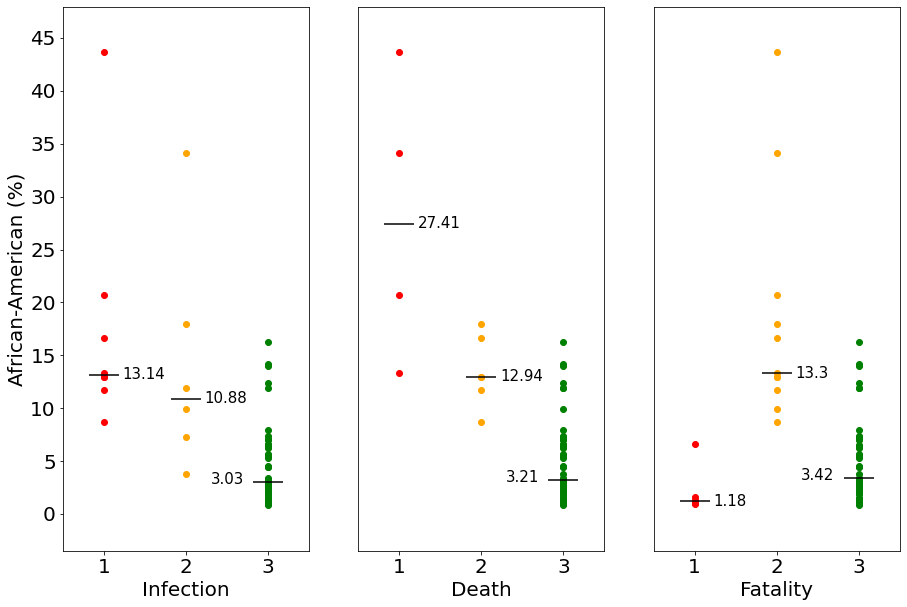

In [ ]:
sydata = pd.read_csv("/covid19-project/final file/data/sycluster.csv")
sydata['County'] = sydata['County'].replace('New York', 'Manhattan')
sydata['County'] = sydata['County'].replace('Staten Island', 'Richmond')

ethdata = pd.read_csv("/covid19-project/final file/data/NY_Counties_Census.csv") 
ethdata['County'] = ethdata['Area_Name'].map(lambda x: x[0:-7])  
ethdata['%His'] = ethdata['H_Population']/ethdata['POP_ESTIMATE_2018'] * 100
ethdata['%AfA'] = ethdata['BA_population']/ethdata['POP_ESTIMATE_2018'] * 100
ethdata['%ab65'] = ethdata['Total_age65plus'] / ethdata['POP_ESTIMATE_2018'] * 100

caseandeth = sydata.merge(ethdata, on = 'County')

i = 0
subplots = [131, 132, 133]
plt.figure(figsize=(15,10))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
for cluster in clusters:

  print('African American Mann-Whitney rank test | '+ clustdict[cluster] +' Cluster')
  print(mannwhitneyu(caseandeth[caseandeth[cluster] == 1]['%AfA'], caseandeth[caseandeth[cluster] == 2]['%AfA']))
  print(mannwhitneyu(caseandeth[caseandeth[cluster] == 1]['%AfA'], caseandeth[caseandeth[cluster] == 3]['%AfA']))
  print(mannwhitneyu(caseandeth[caseandeth[cluster] == 2]['%AfA'], caseandeth[caseandeth[cluster] == 3]['%AfA']))

  caseandethPoscust1 = caseandeth[caseandeth[cluster] == 1]
  caseandethPoscust2 = caseandeth[caseandeth[cluster] == 2]
  caseandethPoscust3 = caseandeth[caseandeth[cluster] == 3]

  qcust1 = [np.quantile(caseandethPoscust1['%AfA'].to_list(), 0.5)]
  qcust2 = [np.quantile(caseandethPoscust2['%AfA'].to_list(), 0.5)]
  qcust3 = [np.quantile(caseandethPoscust3['%AfA'].to_list(), 0.5)]
  
  ax[i].scatter(caseandethPoscust1[cluster], caseandethPoscust1['%AfA'], color='red')
  ax[i].scatter([1], qcust1, marker='_', s=[30**2], color='black')

  ax[i].text(1.23, qcust1[0]-0.4, str(round(qcust1[0],2)), fontsize = 15)

  ax[i].scatter(caseandethPoscust2[cluster], caseandethPoscust2['%AfA'], color='orange')
  ax[i].scatter([2], qcust2, marker='_', s=[30**2], color='black')

  if cluster == 'CaseCluster' :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)
  else :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)

  ax[i].scatter(caseandethPoscust3[cluster], caseandethPoscust3['%AfA'], color='green')
  ax[i].scatter([3], qcust3, marker='_', s=[30**2], color='black')

  ax[i].text(3-0.7, qcust3[0]-0.2, str(round(qcust3[0],2)), fontsize =15)
  
  ax[i].tick_params(axis='both', which='major', labelsize=20)
  ax[i].set_xticks(np.arange(1, 4, step=1))
  ax[i].set_yticks(np.arange(0, 46, step=5))

  if i == 0:
    ax[i].tick_params(axis='y', colors='black')
  else:
    ax[i].tick_params(axis='y', colors='white')

  ax[i].set_xlabel(clustdict[cluster], fontsize=20)

  if i == 0:
    ax[i].set_ylabel('African-American (%)', fontsize=20)
  else:
    ax[i].set_ylabel('', fontsize=20)

  ax[i].margins(x=0.25, y=0.1)

  i += 1

plt.show()

#### Figure 3D

Hispanic American Mann-Whitney rank test | Infection Cluster
MannwhitneyuResult(statistic=9.0, pvalue=0.030607317477300996)
MannwhitneyuResult(statistic=0.0, pvalue=3.664472386728678e-06)
MannwhitneyuResult(statistic=2.0, pvalue=4.916842062148709e-05)
Hispanic American Mann-Whitney rank test | Death Cluster
MannwhitneyuResult(statistic=9.0, pvalue=0.29701617029952077)
MannwhitneyuResult(statistic=0.0, pvalue=0.0004960215299275038)
MannwhitneyuResult(statistic=0.0, pvalue=3.5898822325800845e-05)
Hispanic American Mann-Whitney rank test | Fatality Cluster
MannwhitneyuResult(statistic=0.0, pvalue=0.0005446734843997918)
MannwhitneyuResult(statistic=50.0, pvalue=0.006748478027841794)
MannwhitneyuResult(statistic=0.0, pvalue=1.754170326286929e-07)


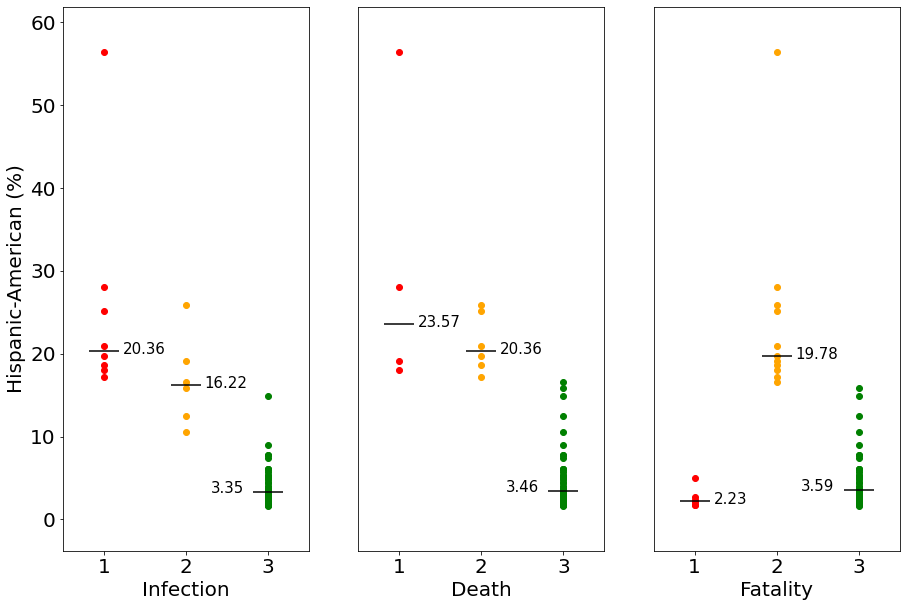

In [ ]:
sydata = pd.read_csv("/covid19-project/final file/data/sycluster.csv")
sydata['County'] = sydata['County'].replace('New York', 'Manhattan')
sydata['County'] = sydata['County'].replace('Staten Island', 'Richmond')

ethdata = pd.read_csv("/covid19-project/final file/data/NY_Counties_Census.csv") 
ethdata['County'] = ethdata['Area_Name'].map(lambda x: x[0:-7])  
ethdata['%His'] = ethdata['H_Population']/ethdata['POP_ESTIMATE_2018'] * 100
ethdata['%AfA'] = ethdata['BA_population']/ethdata['POP_ESTIMATE_2018'] * 100
ethdata['%ab65'] = ethdata['Total_age65plus'] / ethdata['POP_ESTIMATE_2018'] * 100

caseandeth = sydata.merge(ethdata, on = 'County')

i = 0
subplots = [131, 132, 133]
plt.figure(figsize=(15,10))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
for cluster in clusters:

  print('Hispanic American Mann-Whitney rank test | '+ clustdict[cluster] +' Cluster')
  print(mannwhitneyu(caseandeth[caseandeth[cluster] == 1]['%His'], caseandeth[caseandeth[cluster] == 2]['%His']))
  print(mannwhitneyu(caseandeth[caseandeth[cluster] == 1]['%His'], caseandeth[caseandeth[cluster] == 3]['%His']))
  print(mannwhitneyu(caseandeth[caseandeth[cluster] == 2]['%His'], caseandeth[caseandeth[cluster] == 3]['%His']))

  caseandethPoscust1 = caseandeth[caseandeth[cluster] == 1]
  caseandethPoscust2 = caseandeth[caseandeth[cluster] == 2]
  caseandethPoscust3 = caseandeth[caseandeth[cluster] == 3]

  qcust1 = [np.quantile(caseandethPoscust1['%His'].to_list(), 0.5)]
  qcust2 = [np.quantile(caseandethPoscust2['%His'].to_list(), 0.5)]
  qcust3 = [np.quantile(caseandethPoscust3['%His'].to_list(), 0.5)]
  
  ax[i].scatter(caseandethPoscust1[cluster], caseandethPoscust1['%His'], color='red')
  ax[i].scatter([1], qcust1, marker='_', s=[30**2], color='black')

  ax[i].text(1.23, qcust1[0]-0.4, str(round(qcust1[0],2)), fontsize = 15)

  ax[i].scatter(caseandethPoscust2[cluster], caseandethPoscust2['%His'], color='orange')
  ax[i].scatter([2], qcust2, marker='_', s=[30**2], color='black')

  if cluster == 'CaseCluster' :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)
  else :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)

  ax[i].scatter(caseandethPoscust3[cluster], caseandethPoscust3['%His'], color='green')
  ax[i].scatter([3], qcust3, marker='_', s=[30**2], color='black')

  ax[i].text(3-0.7, qcust3[0]-0.2, str(round(qcust3[0],2)), fontsize =15)
  
  ax[i].tick_params(axis='both', which='major', labelsize=20)
  ax[i].set_xticks(np.arange(1, 4, step=1))
  ax[i].set_yticks(np.arange(0, 61, step=10))

  if i == 0:
    ax[i].tick_params(axis='y', colors='black')
  else:
    ax[i].tick_params(axis='y', colors='white')

  ax[i].set_xlabel(clustdict[cluster], fontsize=20)

  if i == 0:
    ax[i].set_ylabel('Hispanic-American (%)', fontsize=20)
  else:
    ax[i].set_ylabel('', fontsize=20)

  ax[i].margins(x=0.25, y=0.1)

  i += 1

plt.show()

#### Figure 3E

Population below poverty Line Mann-Whitney rank test | Infection Cluster
MannwhitneyuResult(statistic=16.0, pvalue=0.16646080403278296)
MannwhitneyuResult(statistic=124.0, pvalue=0.05692025140645496)
MannwhitneyuResult(statistic=124.0, pvalue=0.2956527971245614)
Population below poverty Line Mann-Whitney rank test | Death Cluster
MannwhitneyuResult(statistic=3.0, pvalue=0.03497717929000515)
MannwhitneyuResult(statistic=53.0, pvalue=0.05400268976935792)
MannwhitneyuResult(statistic=76.0, pvalue=0.02114847710812951)
Population below poverty Line Mann-Whitney rank test | Fatality Cluster
MannwhitneyuResult(statistic=27.0, pvalue=0.2902101833979603)
MannwhitneyuResult(statistic=77.0, pvalue=0.04629749046802915)
MannwhitneyuResult(statistic=234.0, pvalue=0.39427127777087784)


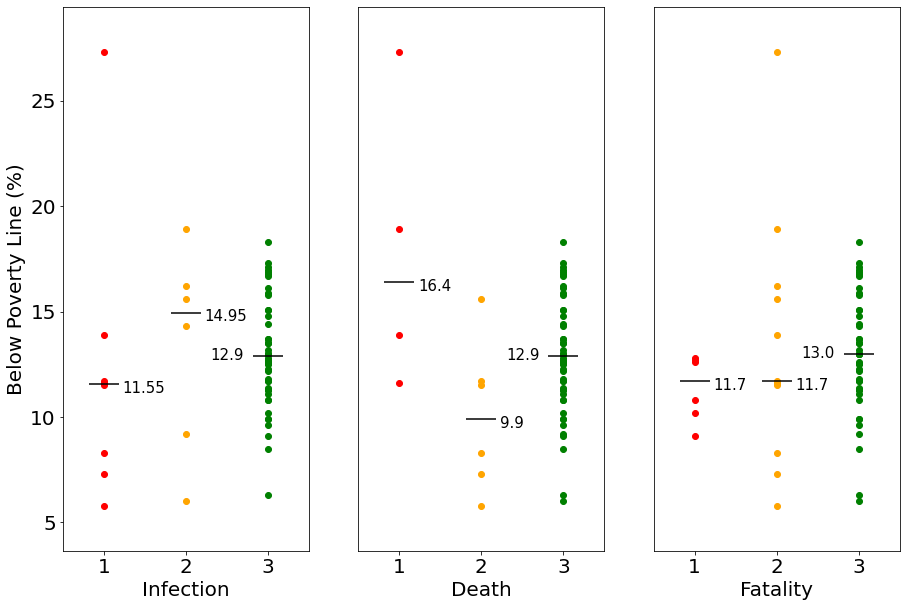

In [ ]:
sydata = pd.read_csv("/covid19-project/final file/data/sycluster.csv")
sydata['County'] = sydata['County'].replace('New York', 'Manhattan')
sydata['County'] = sydata['County'].replace('Staten Island', 'Richmond')

poverdata = pd.read_csv("/covid19-project/final file/data/PovertyReport_percentage.csv") 
poverdata = poverdata.replace('Kings', 'Brooklyn')
poverdata = poverdata.replace('New York', 'Manhattan')
poverdata = poverdata.replace('Staten Island', 'Richmond')
poverdata['County'] = poverdata['county']
poverdata = poverdata.loc[0:61]

caseandpov = sydata.merge(poverdata, on = 'County')
caseandpov['total_est_pct'] = pd.to_numeric(caseandpov['total_est_pct'])
caseandpov['under18_pct'] = pd.to_numeric(caseandpov['under18_pct'])
caseandpov['above_pct'] = 100 - caseandpov['total_est_pct']

i = 0
subplots = [131, 132, 133]
plt.figure(figsize=(15,10))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
for cluster in clusters:

  print('Population below poverty Line Mann-Whitney rank test | '+ clustdict[cluster] +' Cluster')
  print(mannwhitneyu(caseandpov[caseandpov[cluster] == 1]['total_est_pct'], caseandpov[caseandpov[cluster] == 2]['total_est_pct']))
  print(mannwhitneyu(caseandpov[caseandpov[cluster] == 1]['total_est_pct'], caseandpov[caseandpov[cluster] == 3]['total_est_pct']))
  print(mannwhitneyu(caseandpov[caseandpov[cluster] == 2]['total_est_pct'], caseandpov[caseandpov[cluster] == 3]['total_est_pct']))

  caseandpovPoscust1 = caseandpov[caseandpov[cluster] == 1]
  caseandpovPoscust2 = caseandpov[caseandpov[cluster] == 2]
  caseandpovPoscust3 = caseandpov[caseandpov[cluster] == 3]

  qcust1 = [np.quantile(caseandpovPoscust1['total_est_pct'].to_list(), 0.5)]
  qcust2 = [np.quantile(caseandpovPoscust2['total_est_pct'].to_list(), 0.5)]
  qcust3 = [np.quantile(caseandpovPoscust3['total_est_pct'].to_list(), 0.5)]
  
  ax[i].scatter(caseandpovPoscust1[cluster], caseandpovPoscust1['total_est_pct'], color='red')
  ax[i].scatter([1], qcust1, marker='_', s=[30**2], color='black')

  ax[i].text(1.23, qcust1[0]-0.4, str(round(qcust1[0],2)), fontsize = 15)

  ax[i].scatter(caseandpovPoscust2[cluster], caseandpovPoscust2['total_est_pct'], color='orange')
  ax[i].scatter([2], qcust2, marker='_', s=[30**2], color='black')

  if cluster == 'CaseCluster' :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)
  else :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)

  ax[i].scatter(caseandpovPoscust3[cluster], caseandpovPoscust3['total_est_pct'], color='green')
  ax[i].scatter([3], qcust3, marker='_', s=[30**2], color='black')

  ax[i].text(3-0.7, qcust3[0]-0.2, str(round(qcust3[0],2)), fontsize =15)
  
  ax[i].tick_params(axis='both', which='major', labelsize=20)
  ax[i].set_xticks(np.arange(1, 4, step=1))
  ax[i].set_yticks(np.arange(0, 31, step=5))

  if i == 0:
    ax[i].tick_params(axis='y', colors='black')
  else:
    ax[i].tick_params(axis='y', colors='white')

  ax[i].set_xlabel(clustdict[cluster], fontsize=20)

  if i == 0:
    ax[i].set_ylabel('Below Poverty Line (%)', fontsize=20)
  else:
    ax[i].set_ylabel('', fontsize=20)

  ax[i].margins(x=0.25, y=0.1)

  i += 1
  
plt.show()

#### Figure 3F

Distance from epicenter Mann-Whitney rank test | Infection Cluster
MannwhitneyuResult(statistic=14.5, pvalue=0.19535715388269448)
MannwhitneyuResult(statistic=0.0, pvalue=1.1671966032719287e-05)
MannwhitneyuResult(statistic=0.0, pvalue=3.9086478518574176e-05)
Distance from epicenter Mann-Whitney rank test | Death Cluster
MannwhitneyuResult(statistic=5.0, pvalue=0.13417029454794094)
MannwhitneyuResult(statistic=0.0, pvalue=0.0004956245916154104)
MannwhitneyuResult(statistic=2.0, pvalue=0.000161052565435826)
Distance from epicenter Mann-Whitney rank test | Fatality Cluster
MannwhitneyuResult(statistic=0.0, pvalue=0.0006821964771908046)
MannwhitneyuResult(statistic=109.5, pvalue=0.23241055974405228)
MannwhitneyuResult(statistic=4.0, pvalue=7.472681256689763e-07)


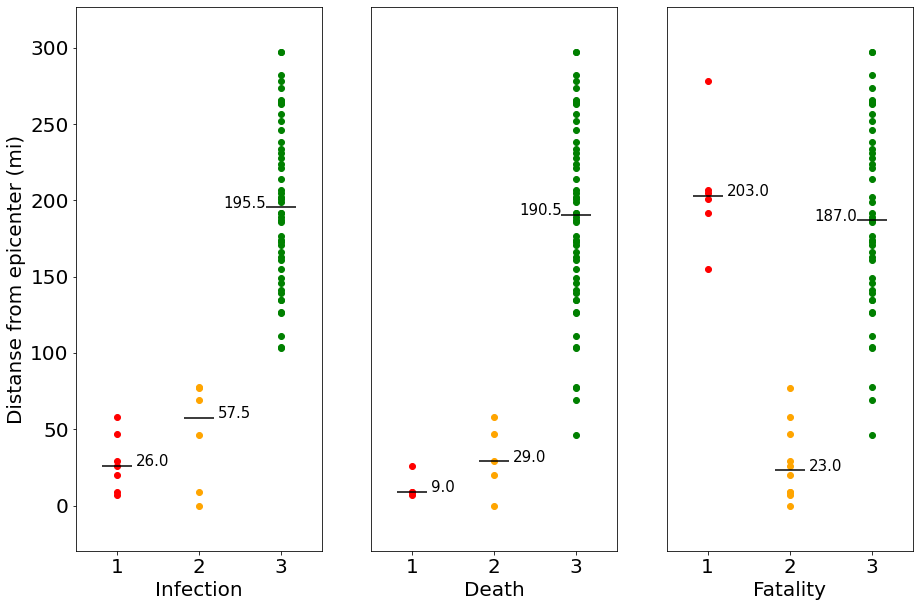

In [ ]:
sydata = pd.read_csv("/covid19-project/final file/data/sycluster.csv")
sydata['County'] = sydata['County'].replace('New York', 'Manhattan')
sydata['County'] = sydata['County'].replace('Staten Island', 'Richmond')

distance = pd.read_excel("/covid19-project/final file/data/Counties_NYC_Distance.xls")
distance['County'] = distance['COUNTY']
# distance['County'] = distance['County'].replace('Staten Island', 'Richmond')

caseanddist = sydata.merge(distance, on = 'County')

i = 0
subplots = [131, 132, 133]
plt.figure(figsize=(15,10))
ax = [plt.subplot(subplots[0]), plt.subplot(subplots[1]), plt.subplot(subplots[2])]
for cluster in clusters:

  print('Distance from epicenter Mann-Whitney rank test | '+ clustdict[cluster] +' Cluster')
  print(mannwhitneyu(caseanddist[caseanddist[cluster] == 1]['Distance_Miles'], caseanddist[caseanddist[cluster] == 2]['Distance_Miles']))
  print(mannwhitneyu(caseanddist[caseanddist[cluster] == 1]['Distance_Miles'], caseanddist[caseanddist[cluster] == 3]['Distance_Miles']))
  print(mannwhitneyu(caseanddist[caseanddist[cluster] == 2]['Distance_Miles'], caseanddist[caseanddist[cluster] == 3]['Distance_Miles']))

  caseanddistPoscust1 = caseanddist[caseanddist[cluster] == 1]
  caseanddistPoscust2 = caseanddist[caseanddist[cluster] == 2]
  caseanddistPoscust3 = caseanddist[caseanddist[cluster] == 3]

  qcust1 = [np.quantile(caseanddistPoscust1['Distance_Miles'].to_list(), 0.5)]
  qcust2 = [np.quantile(caseanddistPoscust2['Distance_Miles'].to_list(), 0.5)]
  qcust3 = [np.quantile(caseanddistPoscust3['Distance_Miles'].to_list(), 0.5)]
  
  ax[i].scatter(caseanddistPoscust1[cluster], caseanddistPoscust1['Distance_Miles'], color='red')
  ax[i].scatter([1], qcust1, marker='_', s=[30**2], color='black')

  ax[i].text(1.23, qcust1[0]-0.4, str(round(qcust1[0],2)), fontsize = 15)

  ax[i].scatter(caseanddistPoscust2[cluster], caseanddistPoscust2['Distance_Miles'], color='orange')
  ax[i].scatter([2], qcust2, marker='_', s=[30**2], color='black')

  if cluster == 'CaseCluster' :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)
  else :
    ax[i].text(2.23, qcust2[0]-0.4, str(round(qcust2[0],2)), fontsize = 15)

  ax[i].scatter(caseanddistPoscust3[cluster], caseanddistPoscust3['Distance_Miles'], color='green')
  ax[i].scatter([3], qcust3, marker='_', s=[30**2], color='black')

  ax[i].text(3-0.7, qcust3[0]-0.2, str(round(qcust3[0],2)), fontsize =15)
  
  ax[i].tick_params(axis='both', which='major', labelsize=20)
  ax[i].set_xticks(np.arange(1, 4, step=1))
  ax[i].set_yticks(np.arange(0, 350, step=50))

  if i == 0:
    ax[i].tick_params(axis='y', colors='black')
  else:
    ax[i].tick_params(axis='y', colors='white')

  ax[i].set_xlabel(clustdict[cluster], fontsize=20)

  if i == 0:
    ax[i].set_ylabel('Distanse from epicenter (mi)', fontsize=20)
  else:
    ax[i].set_ylabel('', fontsize=20)

  ax[i].margins(x=0.25, y=0.1)

  i += 1

plt.show()